In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## 超参数

In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

## “玩具”数据集

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## 线性回归模型

In [4]:
model = nn.Linear(input_size, output_size).cuda()

## 损失函数和优化器

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 训练模型

In [6]:
for epoch in range(num_epochs):
    # 将Numpy矩阵转为Torch张量
    inputs = torch.from_numpy(x_train).cuda()
    targets = torch.from_numpy(y_train).cuda()
    
    # 前向传播
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 反向传播和优化
    optimizer.zero_grad()# optimizer.zero_grad()意思是把梯度置零，也就是把loss关于weight的导数变成0.
    loss.backward()
    optimizer.step()
    
    if(epoch+1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    

Epoch [5/60], Loss: 11.9402
Epoch [10/60], Loss: 4.9385
Epoch [15/60], Loss: 2.1019
Epoch [20/60], Loss: 0.9528
Epoch [25/60], Loss: 0.4873
Epoch [30/60], Loss: 0.2987
Epoch [35/60], Loss: 0.2223
Epoch [40/60], Loss: 0.1913
Epoch [45/60], Loss: 0.1788
Epoch [50/60], Loss: 0.1737
Epoch [55/60], Loss: 0.1716
Epoch [60/60], Loss: 0.1708


## 绘制图，保存模型

In [12]:
predicted = model(torch.from_numpy(x_train).cpu().cuda()).cpu().detach().numpy()

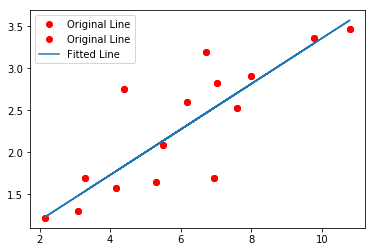

In [14]:
plt.plot(x_train, y_train, 'ro', label='Original Line')
plt.plot(x_train, predicted, label='Fitted Line')
plt.legend()
plt.show()

# 保存模型检查点
torch.save(model.state_dict(), 'model.ckpt')